# I. MySQL에서 데이터 로드

In [1]:
# pip install pymysql

In [2]:
# pip install seaborn

In [2]:
import pymysql
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
from config import DB_CONFIG

# MySQL 연결
conn = pymysql.connect(
    host=DB_CONFIG['host'],
    user=DB_CONFIG['user'],
    password=DB_CONFIG['password'],
    database=DB_CONFIG['database'],
    port=DB_CONFIG['port'],
    charset='utf8mb4'
)

In [51]:
# MySQL에서 데이터 가져오기
conn = pymysql.connect(host=DB_HOST, user=DB_USER, password=DB_PASSWORD, database=DB_NAME)
car_siren = f"SELECT * FROM merge_car_siren"
car_horn = f"SELECT * FROM merge_car_horn"
car_driving = f'SELECT * FROM merge_car_driving_sound'
motorcycle_horn  = f'SELECT * FROM merge_motorcycle_horn'
motorcycle_driving  = f'SELECT * FROM merge_motorcycle_driving_sound'

car_siren_df =  pd.read_sql(car_siren, conn)
car_horn_df = pd.read_sql(car_horn, conn) 
car_driving_df = pd.read_sql(car_driving, conn) 
motorcycle_horn_df= pd.read_sql(motorcycle_horn, conn) 
motorcycle_driving_df = pd.read_sql(motorcycle_driving, conn) 

conn.close()

/tmp/ipykernel_3060/1700635407.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_siren_df =  pd.read_sql(car_siren, conn)
/tmp/ipykernel_3060/1700635407.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_horn_df = pd.read_sql(car_horn, conn)
/tmp/ipykernel_3060/1700635407.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_driving_df = pd.read_sql(car_driving, conn)
/tmp/ipykernel_3060/1700635407.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sq

# II. EDA 및 전처리

In [52]:
print(f'car_siren 데이터 개수: {car_siren_df.shape[0]}')
print(f'car_horn 데이터 개수: {car_horn_df.shape[0]}')
print(f'car_driving 데이터 개수: {car_driving_df.shape[0]}')
print(f'motorcycle_horn 데이터 개수: {motorcycle_horn_df.shape[0]}')
print(f'motorcycle_driving 데이터 개수: {motorcycle_driving_df.shape[0]}')

car_siren 데이터 개수: 1990
car_horn 데이터 개수: 3189
car_driving 데이터 개수: 1682
motorcycle_horn 데이터 개수: 4560
motorcycle_driving 데이터 개수: 4735


In [53]:
car_horn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fileName       3189 non-null   object 
 1   labelName      3189 non-null   object 
 2   area_start     3189 non-null   float64
 3   area_end       3189 non-null   float64
 4   category_01    3189 non-null   object 
 5   category_02    3189 non-null   object 
 6   category_03    3189 non-null   object 
 7   decibel        3189 non-null   int64  
 8   soundQuality   3189 non-null   object 
 9   subCategory    3189 non-null   object 
 10  bitRate        3189 non-null   object 
 11  duration       3189 non-null   float64
 12  fileFormat     3189 non-null   object 
 13  fileSize       3189 non-null   int64  
 14  recodingType   3189 non-null   object 
 15  sampleRate     3189 non-null   object 
 16  acqDevice      3189 non-null   object 
 17  acqMethod      3189 non-null   object 
 18  acqType 

In [54]:
car_horn_df.head()

,fileName,labelName,area_start,area_end,category_01,category_02,category_03,decibel,soundQuality,subCategory,...,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,1.car_horn_30849_1.wav,1.car_horn_30849_1.wav,2.0,11.048,교통소음,자동차,차량경적,68,정상,소형차경적,...,37.183453,-10.836115,25.585962,0.232516,5.053774,12.176615,4.831705,-8.831820,10.174751,2.365335
1,1.car_horn_30865_1.wav,1.car_horn_30865_1.wav,2.0,10.672,교통소음,자동차,차량경적,75,정상,소형차경적,...,10.472818,-25.531940,-0.819976,-21.547447,16.138535,-0.490012,0.726548,-9.243734,-1.005557,-10.407813
2,1.car_horn_30869_1.wav,1.car_horn_30869_1.wav,2.0,12.245,교통소음,자동차,차량경적,68,정상,소형차경적,...,-2.516794,-12.093688,21.846487,10.806868,14.971516,9.503950,15.538783,15.781241,0.750223,-8.508451
3,1.car_horn_30874_1.wav,1.car_horn_30874_1.wav,2.0,10.289,교통소음,자동차,차량경적,69,정상,소형차경적,...,18.060278,-17.298338,28.503597,14.064431,7.452422,12.441176,16.612614,2.910048,-6.256705,-6.246398
4,1.car_horn_59_1.wav,1.car_horn_59_1.wav,2.0,4.029,교통소음,자동차,차량경적,107,정상,소형차경적,...,21.661055,-9.801945,12.513287,2.843365,8.194932,7.828580,8.889499,5.067267,2.928293,10.400720


In [55]:
car_horn_df.iloc[ : ,-13:] 

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,-328.99643,110.927765,13.474552,37.183453,-10.836115,25.585962,0.232516,5.053774,12.176615,4.831705,-8.831820,10.174751,2.365335
1,-380.94937,82.016785,-38.369390,10.472818,-25.531940,-0.819976,-21.547447,16.138535,-0.490012,0.726548,-9.243734,-1.005557,-10.407813
2,-498.20813,114.061424,1.980113,-2.516794,-12.093688,21.846487,10.806868,14.971516,9.503950,15.538783,15.781241,0.750223,-8.508451
3,-456.39767,111.490440,-6.244432,18.060278,-17.298338,28.503597,14.064431,7.452422,12.441176,16.612614,2.910048,-6.256705,-6.246398
4,-199.50888,199.641110,-13.681638,21.661055,-9.801945,12.513287,2.843365,8.194932,7.828580,8.889499,5.067267,2.928293,10.400720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,-264.83923,197.210750,-77.277880,23.032236,11.380154,7.896886,11.269576,-4.560492,17.224950,4.160231,-1.057662,0.926013,-7.930759
3185,-426.90427,130.722400,47.745327,8.306962,5.675391,15.449170,5.677291,6.208929,-0.195498,-5.397255,-2.674880,-6.652485,-10.272819
3186,-316.11063,194.271060,-29.530697,35.808052,12.489090,23.182838,11.050718,3.705868,11.450807,-0.165664,2.353512,0.390641,5.358946
3187,-228.09323,64.343980,-13.663012,41.246460,-7.827433,21.293640,-13.415158,3.358162,5.326135,-3.165687,-11.261456,-1.512664,6.411310


In [10]:
#데이터프레임 병합 
df_combined = pd.concat([car_horn_df, car_siren_df,car_driving_df,motorcycle_horn_df,motorcycle_driving_df], ignore_index=True)

print(f'df_combined 행 개수: {len(df_combined)}') 
df_combined.head()

df_combined 행 개수: 16156


,fileName,labelName,area_start,area_end,category_01,category_02,category_03,decibel,soundQuality,subCategory,...,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,1.car_horn_30849_1.wav,1.car_horn_30849_1.wav,2.0,11.048,교통소음,자동차,차량경적,68,정상,소형차경적,...,37.183453,-10.836115,25.585962,0.232516,5.053774,12.176615,4.831705,-8.831820,10.174751,2.365335
1,1.car_horn_30865_1.wav,1.car_horn_30865_1.wav,2.0,10.672,교통소음,자동차,차량경적,75,정상,소형차경적,...,10.472818,-25.531940,-0.819976,-21.547447,16.138535,-0.490012,0.726548,-9.243734,-1.005557,-10.407813
2,1.car_horn_30869_1.wav,1.car_horn_30869_1.wav,2.0,12.245,교통소음,자동차,차량경적,68,정상,소형차경적,...,-2.516794,-12.093688,21.846487,10.806868,14.971516,9.503950,15.538783,15.781241,0.750223,-8.508451
3,1.car_horn_30874_1.wav,1.car_horn_30874_1.wav,2.0,10.289,교통소음,자동차,차량경적,69,정상,소형차경적,...,18.060278,-17.298338,28.503597,14.064431,7.452422,12.441176,16.612614,2.910048,-6.256705,-6.246398
4,1.car_horn_59_1.wav,1.car_horn_59_1.wav,2.0,4.029,교통소음,자동차,차량경적,107,정상,소형차경적,...,21.661055,-9.801945,12.513287,2.843365,8.194932,7.828580,8.889499,5.067267,2.928293,10.400720


In [11]:
df_combined.iloc[ : ,-13:] 

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,-328.99643,110.927765,13.474552,37.183453,-10.836115,25.585962,0.232516,5.053774,12.176615,4.831705,-8.831820,10.174751,2.365335
1,-380.94937,82.016785,-38.369390,10.472818,-25.531940,-0.819976,-21.547447,16.138535,-0.490012,0.726548,-9.243734,-1.005557,-10.407813
2,-498.20813,114.061424,1.980113,-2.516794,-12.093688,21.846487,10.806868,14.971516,9.503950,15.538783,15.781241,0.750223,-8.508451
3,-456.39767,111.490440,-6.244432,18.060278,-17.298338,28.503597,14.064431,7.452422,12.441176,16.612614,2.910048,-6.256705,-6.246398
4,-199.50888,199.641110,-13.681638,21.661055,-9.801945,12.513287,2.843365,8.194932,7.828580,8.889499,5.067267,2.928293,10.400720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16151,-216.76335,227.552900,-82.289760,16.343384,-4.159147,-1.904160,10.840672,-6.094479,17.134110,-8.040121,-5.996139,-3.300848,-16.263510
16152,-260.36172,232.860840,-65.116700,39.084170,-3.065447,-7.736792,3.819775,-23.061602,6.557758,-13.926962,0.232121,0.180463,-9.043220
16153,-226.24818,233.032470,-56.155680,20.904785,-7.488766,-5.550318,1.841214,-16.429771,5.814109,-12.387865,-7.400935,-5.786819,-12.857692
16154,-200.10258,227.743970,-65.901590,5.604812,-13.910416,-17.113100,-6.478857,-20.236270,-2.118787,-16.228954,-6.787997,-3.972823,-13.148409


# III. 1차 모델링 - 기본 CapsNet 모델

In [12]:
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # warning 메시지 숨기기

import tensorflow as tf
print("Is GPU available:", tf.test.is_gpu_available())

import tensorflow as tf
print('tf.__version__:',tf.__version__)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is GPU available: True
tf.__version__: 2.13.0


2025-02-26 09:32:23.479484: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-26 09:32:23.491212: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-26 09:32:23.492820: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [13]:
tf.config.set_visible_devices([], 'GPU')

2025-02-26 09:32:25.906733: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-26 09:32:25.908529: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-26 09:32:25.909982: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [14]:
!nvidia-smi

Wed Feb 26 09:32:31 2025       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:1E.0 Off |                    0 |
| N/A   30C    P0    24W /  70W |    564MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 1. 데이터 로드 및 전처리

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import random

In [40]:
# 데이터프레임에서 X(특징)와 y(레이블) 분리
X = df_combined.iloc[:, -13:]  # MFCC 특징 선택
y = df_combined['category_03']  # 차량경적, 차량사이렌 등 라벨

# 범주형 데이터를 숫자로 변환
y = y.astype('category').cat.codes

# 데이터셋 분할 (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train을 numpy 배열로 변환 후 reshape (CNN 입력 형태)
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# One-hot encoding (총 5개 클래스: 차량경적, 차량주행음, 차량사이렌, 오토바이경적, 오토바이주행음)
num_classes = 5
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# "기타 소음"을 탐지하는 방식: 추가적인 로직 작성
def add_ood_class(y, threshold=0.7):
    y_ood = np.zeros((y.shape[0], y.shape[1] + 1))
    y_ood[:, :-1] = y
    y_ood[:, -1] = (np.max(y, axis=1) < threshold).astype(int)
    return y_ood

y_train_ood = add_ood_class(y_train)
y_test_ood = add_ood_class(y_test)

# X_train.shape 출력
print("X_train.shape:", X_train.shape)
print("y_train_ood.shape:", y_train_ood.shape)

X_train.shape: (12924, 13, 1)
y_train_ood.shape: (12924, 6)


## 2. CapsNet 모델 정의

In [41]:
from tensorflow.keras import layers, models

def build_capsnet(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    
    # Conv Layer (커널 크기 조정: 9 → 3)
    conv1 = layers.Conv1D(256, 3, activation='relu', padding='valid')(inputs)
    conv2 = layers.Conv1D(256, 3, activation='relu', padding='valid')(conv1)
    
    # PrimaryCaps Layer (커널 크기 조정: 9 → 3)
    primary_caps = layers.Conv1D(32 * 8, 3, strides=2, padding='valid', activation='relu')(conv2)
    
    # Flatten
    primary_caps = layers.Reshape([primary_caps.shape[1] * primary_caps.shape[2] // 8, 8])(primary_caps)
    
    # Fully Connected Capsule Layer
    digit_caps = layers.Dense(num_classes, activation='softmax')(primary_caps)
    
    # Global Average Pooling
    outputs = layers.GlobalAveragePooling1D()(digit_caps)
    
    return models.Model(inputs, outputs)

# 모델 생성 및 컴파일
num_classes_with_ood = num_classes + 1
capsnet = build_capsnet(X_train.shape[1:], num_classes=num_classes_with_ood)
capsnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
capsnet.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 13, 1)]           0         
                                                                 
 conv1d_14 (Conv1D)          (None, 11, 256)           1024      
                                                                 
 conv1d_15 (Conv1D)          (None, 9, 256)            196864    
                                                                 
 conv1d_16 (Conv1D)          (None, 4, 256)            196864    
                                                                 
 reshape_4 (Reshape)         (None, 128, 8)            0         
                                                                 
 dense_3 (Dense)             (None, 128, 6)            54        
                                                                 
 global_average_pooling1d_2  (None, 6)                 0   

## 3. 모델 학습

In [42]:
# 모델 학습
capsnet.fit(X_train, y_train_ood, epochs=10, batch_size=32, validation_data=(X_test, y_test_ood))

Epoch 1/10
404/404 [==============================] - 4s 8ms/step - loss: 0.9048 - accuracy: 0.6602 - val_loss: 0.7275 - val_accuracy: 0.7438
Epoch 2/10
404/404 [==============================] - 3s 7ms/step - loss: 0.6997 - accuracy: 0.7493 - val_loss: 0.6564 - val_accuracy: 0.7599
Epoch 3/10
404/404 [==============================] - 3s 8ms/step - loss: 0.6406 - accuracy: 0.7736 - val_loss: 0.6083 - val_accuracy: 0.7785
Epoch 4/10
404/404 [==============================] - 3s 8ms/step - loss: 0.6049 - accuracy: 0.7866 - val_loss: 0.5786 - val_accuracy: 0.8001
Epoch 5/10
404/404 [==============================] - 3s 9ms/step - loss: 0.5748 - accuracy: 0.7961 - val_loss: 0.5522 - val_accuracy: 0.8106
Epoch 6/10
404/404 [==============================] - 3s 8ms/step - loss: 0.5513 - accuracy: 0.8066 - val_loss: 0.5298 - val_accuracy: 0.8119
Epoch 7/10
404/404 [==============================] - 3s 8ms/step - loss: 0.5279 - accuracy: 0.8181 - val_loss: 0.5209 - val_accuracy: 0.8094
Epoch 

## 4. OOD(기타 소음) 탐지 함수

In [ ]:
def detect_ood(model, X_test, threshold=0.7):
    preds = model.predict(X_test)
    max_probs = np.max(preds[:, :-1], axis=1)  # 마지막 레이블인 "기타 소음"을 제외한 확률값 중 가장 높은 값 추출
    is_ood = preds[:, -1] > threshold  # "기타 소음" 레이블 확률값이 임계값보다 높으면 OOD
    return is_ood, preds

# OOD 탐지 실행
is_ood, preds = detect_ood(capsnet, X_test)

# "기타 소음"으로 탐지된 샘플 수 출력
num_ood_samples = np.sum(is_ood)
print(f"\n기타 소음으로 탐지된 샘플 수: {num_ood_samples}")

# 예측 결과 출력
for i in range(10):  # 10개 샘플만 출력
    actual_label = np.argmax(y_test_ood[i][:-1])  # 실제 라벨 ("기타 소음" 레이블 제외)
    predicted_label = np.argmax(preds[i][:-1]) if not is_ood[i] else "OOD Detected (기타 소음)"
    print(f"샘플 {i}: 실제 라벨={actual_label}, 예측 결과={predicted_label}")

## 5. 모델 평가

Epoch 1/10
404/404 [==============================] - 3s 8ms/step - loss: 0.4779 - accuracy: 0.8367 - val_loss: 0.4886 - val_accuracy: 0.8286
Epoch 2/10
404/404 [==============================] - 3s 8ms/step - loss: 0.4685 - accuracy: 0.8414 - val_loss: 0.4720 - val_accuracy: 0.8323
Epoch 3/10
404/404 [==============================] - 3s 8ms/step - loss: 0.4616 - accuracy: 0.8438 - val_loss: 0.4606 - val_accuracy: 0.8363
Epoch 4/10
404/404 [==============================] - 3s 7ms/step - loss: 0.4534 - accuracy: 0.8466 - val_loss: 0.4565 - val_accuracy: 0.8376
Epoch 5/10
404/404 [==============================] - 3s 8ms/step - loss: 0.4460 - accuracy: 0.8517 - val_loss: 0.4581 - val_accuracy: 0.8388
Epoch 6/10
404/404 [==============================] - 3s 8ms/step - loss: 0.4408 - accuracy: 0.8521 - val_loss: 0.4459 - val_accuracy: 0.8456
Epoch 7/10
404/404 [==============================] - 3s 8ms/step - loss: 0.4317 - accuracy: 0.8553 - val_loss: 0.4537 - val_accuracy: 0.8462
Epoch 

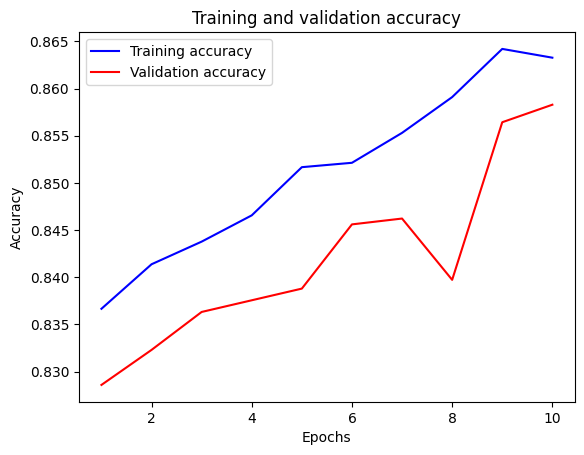

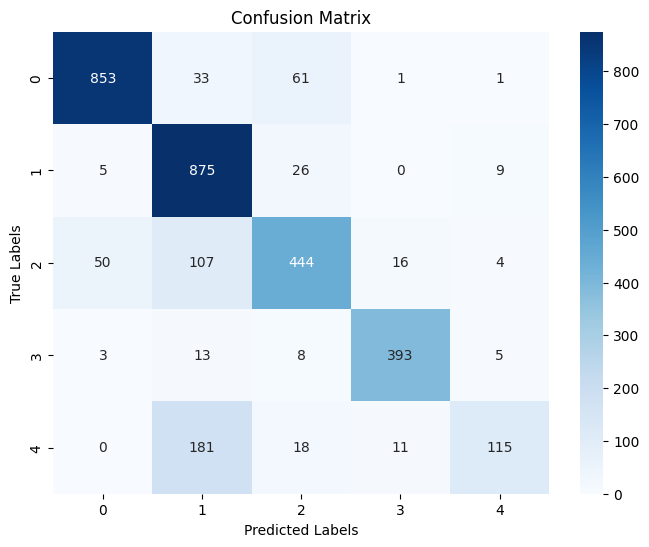

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       949
           1       0.72      0.96      0.82       915
           2       0.80      0.71      0.75       621
           3       0.93      0.93      0.93       422
           4       0.86      0.35      0.50       325

    accuracy                           0.83      3232
   macro avg       0.85      0.77      0.79      3232
weighted avg       0.84      0.83      0.82      3232



In [43]:
# 1) 훈련 정확도와 검증 정확도 비교
history = capsnet.fit(X_train, y_train_ood, epochs=10, batch_size=32, validation_data=(X_test, y_test_ood))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 2) 혼동 행렬
y_pred_labels = np.argmax(preds[:, :-1], axis=1)
y_true_labels = np.argmax(y_test_ood[:, :-1], axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 3) precision, recall, f1-score
print(classification_report(y_true_labels, y_pred_labels))

> 분석 결과 요약

**전반적인 성능**

* **정확도**: 83% (비교적 높음)
* **학습/검증 정확도**: 안정적인 학습 진행, 과적합 심각하지 않음 (early stopping 권장)

**클래스별 성능**

* **클래스 0, 3**: 높은 정밀도/재현율 (우수한 분류 성능)
* **클래스 1**: 높은 재현율, 낮은 정밀도 (과도한 예측 경향)
* **클래스 2**: 중간 수준 정밀도/재현율 (개선 필요)
* **클래스 4**: 매우 낮은 재현율 (탐지 어려움)

**주요 문제점**

* 클래스 불균형 (특히 클래스 4)
* 클래스 1, 4 성능 개선 필요

**개선 방안**

* 데이터 증강 (클래스 4 중심)
* 가중 손실 함수 적용
* 모델 구조 개선 (early stopping 포함)

**종합**

이번 모델은 학습 안정성 및 일부 클래스 성능 개선.  
클래스 불균형 및 특정 클래스 낮은 성능은 해결 과제.  
데이터 증강, 가중 손실 함수, 모델 구조 개선 통한 성능 향상 기대.

# IV. 2차 모델링 - CapsNet 모델 개선

> 개선된 CapsNet 모델:

- 데이터 증강:
클래스 1, 4의 데이터를 중심으로 데이터 증강을 적용하여 데이터 불균형을 완화하고 모델의 일반화 성능을 향상시켰습니다.

- 가중 손실 함수:
클래스 불균형 문제를 해결하기 위해 클래스별 가중치를 계산하고 손실 함수에 적용했습니다.

- 모델 구조 개선:
배치 정규화(BatchNormalization)와 드롭아웃(Dropout)을 추가하여 모델의 안정성을 높이고 과적합을 방지했습니다.

- Early Stopping:
검증 손실(validation loss)을 모니터링하여 과적합이 시작되면 학습을 조기 종료하도록 설정했습니다.

## 1. 데이터 로드 및 전처리

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import librosa

# 데이터프레임에서 X(특징)와 y(레이블) 분리
X = df_combined.iloc[:, -13:]  # MFCC 특징 선택
y = df_combined['category_03']  # 차량경적, 차량사이렌 등 라벨

# 범주형 데이터를 숫자로 변환
y = y.astype('category').cat.codes

# 데이터셋 분할 (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train을 numpy 배열로 변환 후 reshape (CNN 입력 형태)
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# One-hot encoding (총 5개 클래스: 차량경적, 차량주행음, 차량사이렌, 오토바이경적, 오토바이주행음)
num_classes = 5
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# "기타 소음"을 탐지하는 방식: 추가적인 로직 작성
def add_ood_class(y, threshold=0.7):
    y_ood = np.zeros((y.shape[0], y.shape[1] + 1))
    y_ood[:, :-1] = y
    y_ood[:, -1] = (np.max(y, axis=1) < threshold).astype(int)
    return y_ood

y_train_ood = add_ood_class(y_train)
y_test_ood = add_ood_class(y_test)

# 데이터 증강 (클래스 1, 4 중심)
def augment_audio(audio, sr, shift_range=0.1, pitch_range=2, noise_level=0.01):
    shift = int(np.random.uniform(low=-shift_range, high=shift_range) * len(audio))
    audio_shifted = np.roll(audio, shift)
    pitch_factor = np.random.uniform(low=-pitch_range, high=pitch_range)
    audio_pitched = librosa.effects.pitch_shift(audio, sr=sr, n_steps=pitch_factor)
    noise = np.random.normal(0, noise_level, len(audio))
    audio_noisy = audio + noise
    return audio_shifted, audio_pitched, audio_noisy

X_train_augmented = []
y_train_augmented = []

for i in range(len(X_train)):
    audio = X_train[i].flatten()
    label = y_train_ood[i]

    if np.argmax(label[:-1]) == 4:
        audio_shifted, audio_pitched, audio_noisy = augment_audio(audio, sr=22050)
        X_train_augmented.extend([audio_shifted.reshape(-1, 1), audio_pitched.reshape(-1, 1), audio_noisy.reshape(-1, 1)])
        y_train_augmented.extend([label, label, label])
    elif np.argmax(label[:-1]) == 1:
        audio_shifted, audio_pitched, audio_noisy = augment_audio(audio, sr=22050)
        X_train_augmented.extend([audio_shifted.reshape(-1, 1), audio_pitched.reshape(-1, 1), audio_noisy.reshape(-1, 1)])
        y_train_augmented.extend([label, label, label])

    X_train_augmented.append(audio.reshape(-1, 1))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# X_train.shape 출력
print("X_train_augmented.shape:", X_train_augmented.shape)
print("y_train_augmented.shape:", y_train_augmented.shape)

/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=13
  warnings.warn(


X_train_augmented.shape: (28455, 13, 1)
y_train_augmented.shape: (28455, 6)


## 2. CapsNet 모델 정의

In [17]:
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Reshape, Dense, GlobalAveragePooling1D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def build_capsnet_improved(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    conv1 = Conv1D(256, 3, activation='relu', padding='valid')(inputs)
    batch_norm1 = BatchNormalization()(conv1)
    conv2 = Conv1D(256, 3, activation='relu', padding='valid')(batch_norm1)
    batch_norm2 = BatchNormalization()(conv2)
    primary_caps = Conv1D(32 * 8, 3, strides=2, padding='valid', activation='relu')(batch_norm2)
    reshape = Reshape([primary_caps.shape[1] * primary_caps.shape[2] // 8, 8])(primary_caps)
    dropout = Dropout(0.5)(reshape)
    digit_caps = Dense(num_classes, activation='softmax')(dropout)
    outputs = GlobalAveragePooling1D()(digit_caps)
    return Model(inputs, outputs)

# 모델 생성 및 컴파일
num_classes_with_ood = num_classes + 1
capsnet_improved = build_capsnet_improved(X_train_augmented.shape[1:], num_classes=num_classes_with_ood)
optimizer = Adam(learning_rate=0.001)
capsnet_improved.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
capsnet_improved.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 11, 256)           1024      
                                                                 
 batch_normalization (Batch  (None, 11, 256)           1024      
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 256)            196864    
                                                                 
 batch_normalization_1 (Bat  (None, 9, 256)            1024      
 chNormalization)                                                
                                                                 
 conv1d_2 (Conv1D)           (None, 4, 256)            196864

## 3. 모델 학습

In [18]:
from sklearn.utils import class_weight

# 가중 손실 함수
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(np.argmax(y_train_augmented[:, :-1], axis=1)), y=np.argmax(y_train_augmented[:, :-1], axis=1))
class_weights_dict = dict(enumerate(class_weights))

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history_improved = capsnet_improved.fit(X_train_augmented, y_train_augmented, epochs=100, batch_size=32, validation_data=(X_test, y_test_ood), class_weight=class_weights_dict, callbacks=[early_stopping])

Epoch 1/100


2025-02-26 09:33:16.939155: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fc86405b540 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-02-26 09:33:16.939201: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2025-02-26 09:33:16.946726: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-26 09:33:16.982246: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


890/890 [==============================] - 14s 14ms/step - loss: 0.9570 - accuracy: 0.6413 - val_loss: 0.6885 - val_accuracy: 0.7395
Epoch 2/100
890/890 [==============================] - 11s 13ms/step - loss: 0.8075 - accuracy: 0.7238 - val_loss: 0.6231 - val_accuracy: 0.7946
Epoch 3/100
890/890 [==============================] - 12s 13ms/step - loss: 0.7487 - accuracy: 0.7416 - val_loss: 0.5972 - val_accuracy: 0.7976
Epoch 4/100
890/890 [==============================] - 12s 13ms/step - loss: 0.7106 - accuracy: 0.7532 - val_loss: 0.5647 - val_accuracy: 0.8097
Epoch 5/100
890/890 [==============================] - 12s 13ms/step - loss: 0.6845 - accuracy: 0.7572 - val_loss: 0.6305 - val_accuracy: 0.7952
Epoch 6/100
890/890 [==============================] - 11s 12ms/step - loss: 0.6663 - accuracy: 0.7664 - val_loss: 0.5612 - val_accuracy: 0.8020
Epoch 7/100
890/890 [==============================] - 11s 12ms/step - loss: 0.6533 - accuracy: 0.7672 - val_loss: 0.5904 - val_accuracy: 0.79

## 4. OOD(기타 소음) 탐지 함수

In [19]:
def detect_ood(model, X_test, threshold=0.7):
    preds = model.predict(X_test)
    max_probs = np.max(preds[:, :-1], axis=1)
    is_ood = preds[:, -1] > threshold
    return is_ood, preds

# OOD 탐지 실행
is_ood_improved, preds_improved = detect_ood(capsnet_improved, X_test)

# "기타 소음"으로 탐지된 샘플 수 출력
num_ood_samples_improved = np.sum(is_ood_improved)
print(f"\n기타 소음으로 탐지된 샘플 수: {num_ood_samples_improved}")

# 예측 결과 출력
for i in range(10):
    actual_label_improved = np.argmax(y_test_ood[i][:-1])
    predicted_label_improved = np.argmax(preds_improved[i][:-1]) if not is_ood_improved[i] else "OOD Detected (기타 소음)"
    print(f"샘플 {i}: 실제 라벨={actual_label_improved}, 예측 결과={predicted_label_improved}")

101/101 [==============================] - 0s 3ms/step

기타 소음으로 탐지된 샘플 수: 0
샘플 0: 실제 라벨=2, 예측 결과=2
샘플 1: 실제 라벨=4, 예측 결과=4
샘플 2: 실제 라벨=1, 예측 결과=4
샘플 3: 실제 라벨=2, 예측 결과=2
샘플 4: 실제 라벨=0, 예측 결과=0
샘플 5: 실제 라벨=1, 예측 결과=1
샘플 6: 실제 라벨=1, 예측 결과=2
샘플 7: 실제 라벨=0, 예측 결과=0
샘플 8: 실제 라벨=2, 예측 결과=2
샘플 9: 실제 라벨=1, 예측 결과=1


## 5. 모델 평가

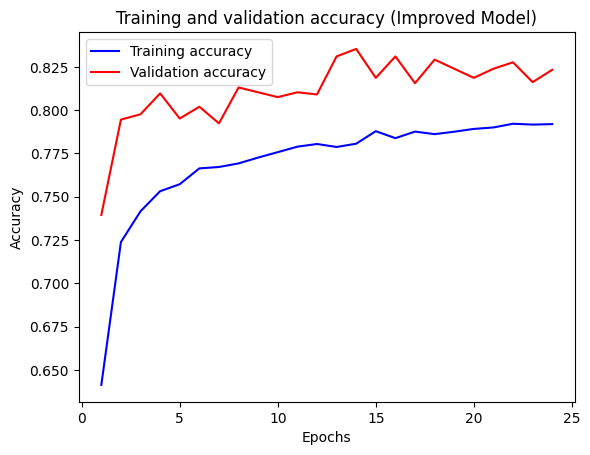

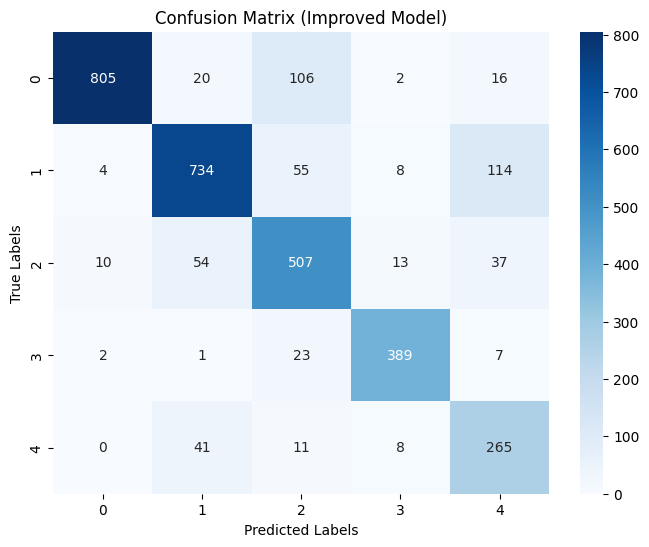

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       949
           1       0.86      0.80      0.83       915
           2       0.72      0.82      0.77       621
           3       0.93      0.92      0.92       422
           4       0.60      0.82      0.69       325

    accuracy                           0.84      3232
   macro avg       0.82      0.84      0.83      3232
weighted avg       0.85      0.84      0.84      3232



In [20]:
# 검증 정확도 시각화
acc_improved = history_improved.history['accuracy']
val_acc_improved = history_improved.history['val_accuracy']
epochs_improved = range(1, len(acc_improved) + 1)
plt.plot(epochs_improved, acc_improved, 'b', label='Training accuracy')
plt.plot(epochs_improved, val_acc_improved, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy (Improved Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 혼동 행렬
y_pred_labels_improved = np.argmax(preds_improved[:, :-1], axis=1)
y_true_labels_improved = np.argmax(y_test_ood[:, :-1], axis=1)
cm_improved = confusion_matrix(y_true_labels_improved, y_pred_labels_improved)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_improved, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Improved Model)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# precision, recall, f1-score
print(classification_report(y_true_labels_improved, y_pred_labels_improved))

> 분석 결과

**전반적인 성능:**

- 전반적인 정확도는 84%로 비교적 높지만, 클래스별 성능 편차가 존재합니다.
- 학습 추이는 안정적이지만, 과적합의 가능성이 존재합니다.

**클래스별 성능:**

- 클래스 0과 3은 높은 분류 성능을 보입니다.
- 클래스 1, 2, 4는 상대적으로 낮은 분류 성능을 보입니다.
- 특히, 클래스 4는 다른 클래스로 오분류되는 경우가 많습니다.

**주요 문제점:**

- 클래스 4의 낮은 분류 성능 (데이터 불균형 및 모델의 분류 능력 부족)
- 클래스 1과 4의 오분류 경향

**개선 방안:**

- 클래스 4에 대한 데이터 증강 강화
- 가중 손실 함수 적용
- 모델 구조 개선
- Early stopping 적용
- 학습률 조절

# III. 3차 모델링 - CapsNet 모델 개선

- 데이터 증강 강화: augment_audio 함수에 시간 축 스트레칭을 추가하고, 클래스 4는 5배, 클래스 1은 3배 증강합니다.
- 모델 구조 개선: Conv1D 레이어의 필터 수를 늘리고, 드롭아웃 비율을 높였습니다.
- 학습률 스케줄링: ReduceLROnPlateau 콜백 함수를 추가하여 학습률을 동적으로 조절합니다.
- Early Stopping: patience 값을 20으로 늘려 학습 조기 종료 조건을 완화했습니다.
- Epoch: 200으로 늘렸습니다.
- batch_size: 64로 늘렸습니다.

## 1. 데이터 로드 및 전처리

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import librosa
from sklearn.utils import class_weight
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Reshape, Dense, GlobalAveragePooling1D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import random

# 데이터프레임에서 X(특징)와 y(레이블) 분리
X = df_combined.iloc[:, -13:]  # MFCC 특징 선택
y = df_combined['category_03']  # 차량경적, 차량사이렌 등 라벨

# 범주형 데이터를 숫자로 변환
y = y.astype('category').cat.codes

# 데이터셋 분할 (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train을 numpy 배열로 변환 후 reshape (CNN 입력 형태)
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# One-hot encoding (총 5개 클래스: 차량경적, 차량주행음, 차량사이렌, 오토바이경적, 오토바이주행음)
num_classes = 5
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# "기타 소음"을 탐지하는 방식: 추가적인 로직 작성
def add_ood_class(y, threshold=0.7):
    y_ood = np.zeros((y.shape[0], y.shape[1] + 1))
    y_ood[:, :-1] = y
    y_ood[:, -1] = (np.max(y, axis=1) < threshold).astype(int)
    return y_ood

y_train_ood = add_ood_class(y_train)
y_test_ood = add_ood_class(y_test)

In [23]:
# 데이터 증강 강화
def augment_audio(audio, sr, shift_range=0.2, pitch_range=3, noise_level=0.02, time_stretch_range=0.1):
    shift = int(np.random.uniform(low=-shift_range, high=shift_range) * len(audio))
    audio_shifted = np.roll(audio, shift)
    pitch_factor = np.random.uniform(low=-pitch_range, high=pitch_range)
    audio_pitched = librosa.effects.pitch_shift(audio, sr=sr, n_steps=pitch_factor)
    noise = np.random.normal(0, noise_level, len(audio))
    audio_noisy = audio + noise
    time_stretch_factor = np.random.uniform(low=1-time_stretch_range, high=1+time_stretch_range)
    audio_time_stretched = librosa.effects.time_stretch(audio, rate=time_stretch_factor)
    if len(audio_time_stretched) < len(audio):
        audio_time_stretched = np.pad(audio_time_stretched, (0, len(audio) - len(audio_time_stretched)), 'constant')
    else:
        audio_time_stretched = audio_time_stretched[:len(audio)]
    return audio_shifted, audio_pitched, audio_noisy, audio_time_stretched

X_train_augmented = []
y_train_augmented = []

for i in range(len(X_train)):
    audio = X_train[i].flatten()
    label = y_train_ood[i]

    if np.argmax(label[:-1]) == 4:
        for _ in range(5): # 클래스 4는 5배 증강
            audio_shifted, audio_pitched, audio_noisy, audio_time_stretched = augment_audio(audio, sr=22050)
            X_train_augmented.extend([audio_shifted.reshape(-1, 1), audio_pitched.reshape(-1, 1), audio_noisy.reshape(-1, 1), audio_time_stretched.reshape(-1,1)])
            y_train_augmented.extend([label, label, label, label])
    elif np.argmax(label[:-1]) == 1:
        for _ in range(3): # 클래스 1은 3배 증강
            audio_shifted, audio_pitched, audio_noisy, audio_time_stretched = augment_audio(audio, sr=22050)
            X_train_augmented.extend([audio_shifted.reshape(-1, 1), audio_pitched.reshape(-1, 1), audio_noisy.reshape(-1, 1), audio_time_stretched.reshape(-1,1)])
            y_train_augmented.extend([label, label, label, label])

    X_train_augmented.append(audio.reshape(-1, 1))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

## 2. CapsNet 모델 정의

In [24]:
# CapsNet 모델 개선
def build_capsnet_improved(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    conv1 = Conv1D(512, 3, activation='relu', padding='valid')(inputs)
    batch_norm1 = BatchNormalization()(conv1)
    conv2 = Conv1D(512, 3, activation='relu', padding='valid')(batch_norm1)
    batch_norm2 = BatchNormalization()(conv2)
    primary_caps = Conv1D(64 * 8, 3, strides=2, padding='valid', activation='relu')(batch_norm2)
    reshape = Reshape([primary_caps.shape[1] * primary_caps.shape[2] // 8, 8])(primary_caps)
    dropout = Dropout(0.6)(reshape)
    digit_caps = Dense(num_classes, activation='softmax')(dropout)
    outputs = GlobalAveragePooling1D()(digit_caps)
    return Model(inputs, outputs)

# 모델 생성 및 컴파일
num_classes_with_ood = num_classes + 1
capsnet_improved = build_capsnet_improved(X_train_augmented.shape[1:], num_classes=num_classes_with_ood)
optimizer = Adam(learning_rate=0.001)
capsnet_improved.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# 가중 손실 함수 조정
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(np.argmax(y_train_augmented[:, :-1], axis=1)), y=np.argmax(y_train_augmented[:, :-1], axis=1))
class_weights_dict = dict(enumerate(class_weights))

In [29]:
# 학습률 스케줄링 및 Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

## 3. 모델 학습

In [30]:
# 모델 학습
history_improved = capsnet_improved.fit(X_train_augmented, y_train_augmented, epochs=200, batch_size=64, validation_data=(X_test, y_test_ood), class_weight=class_weights_dict, callbacks=[early_stopping, reduce_lr])

Epoch 1/200
1343/1343 [==============================] - 59s 43ms/step - loss: 1.0041 - accuracy: 0.6186 - val_loss: 0.7458 - val_accuracy: 0.7240 - lr: 0.0010
Epoch 2/200
1343/1343 [==============================] - 64s 48ms/step - loss: 0.8300 - accuracy: 0.6996 - val_loss: 0.6222 - val_accuracy: 0.7809 - lr: 0.0010
Epoch 3/200
1343/1343 [==============================] - 65s 49ms/step - loss: 0.7798 - accuracy: 0.7230 - val_loss: 0.6516 - val_accuracy: 0.7837 - lr: 0.0010
Epoch 4/200
1343/1343 [==============================] - 55s 41ms/step - loss: 0.7537 - accuracy: 0.7393 - val_loss: 0.7049 - val_accuracy: 0.7676 - lr: 0.0010
Epoch 5/200
1343/1343 [==============================] - 62s 46ms/step - loss: 0.7356 - accuracy: 0.7505 - val_loss: 0.7394 - val_accuracy: 0.7850 - lr: 0.0010
Epoch 6/200
1343/1343 [==============================] - 70s 52ms/step - loss: 0.7227 - accuracy: 0.7554 - val_loss: 0.7282 - val_accuracy: 0.7825 - lr: 0.0010
Epoch 7/200
1343/1343 [=================

## 4. OOD(기타 소음) 탐지 함수

In [32]:
def detect_ood(model, X_test, threshold=0.7):
    preds = model.predict(X_test)
    max_probs = np.max(preds[:, :-1], axis=1)
    is_ood = preds[:, -1] > threshold
    return is_ood, preds

# OOD 탐지 실행
is_ood_improved, preds_improved = detect_ood(capsnet_improved, X_test)

# "기타 소음"으로 탐지된 샘플 수 출력
num_ood_samples_improved = np.sum(is_ood_improved)
print(f"\n기타 소음으로 탐지된 샘플 수: {num_ood_samples_improved}")

# 예측 결과 출력
for i in range(10):
    actual_label_improved = np.argmax(y_test_ood[i][:-1])
    predicted_label_improved = np.argmax(preds_improved[i][:-1]) if not is_ood_improved[i] else "OOD Detected (기타 소음)"
    print(f"샘플 {i}: 실제 라벨={actual_label_improved}, 예측 결과={predicted_label_improved}")

101/101 [==============================] - 1s 7ms/step

기타 소음으로 탐지된 샘플 수: 0
샘플 0: 실제 라벨=2, 예측 결과=2
샘플 1: 실제 라벨=4, 예측 결과=4
샘플 2: 실제 라벨=1, 예측 결과=4
샘플 3: 실제 라벨=2, 예측 결과=2
샘플 4: 실제 라벨=0, 예측 결과=0
샘플 5: 실제 라벨=1, 예측 결과=1
샘플 6: 실제 라벨=1, 예측 결과=2
샘플 7: 실제 라벨=0, 예측 결과=0
샘플 8: 실제 라벨=2, 예측 결과=2
샘플 9: 실제 라벨=1, 예측 결과=1


## 5. 모델 평가

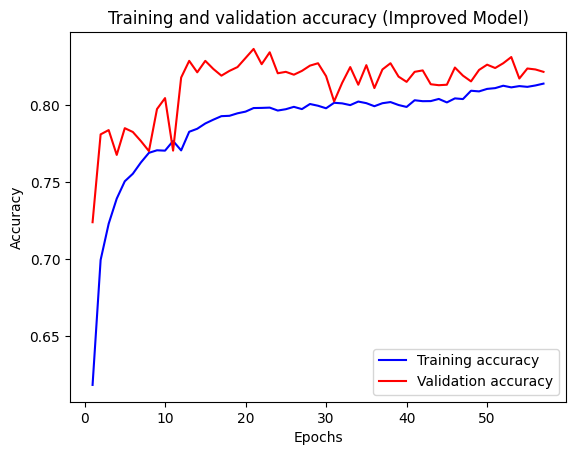

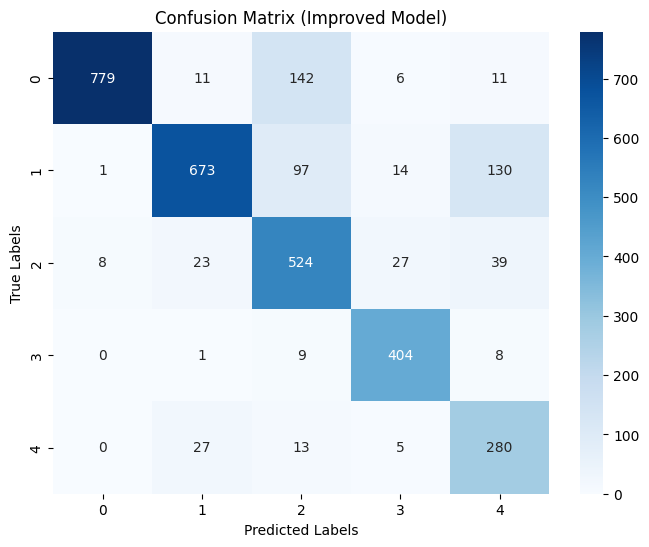

              precision    recall  f1-score   support

           0       0.99      0.82      0.90       949
           1       0.92      0.74      0.82       915
           2       0.67      0.84      0.75       621
           3       0.89      0.96      0.92       422
           4       0.60      0.86      0.71       325

    accuracy                           0.82      3232
   macro avg       0.81      0.84      0.82      3232
weighted avg       0.85      0.82      0.83      3232



In [33]:
# 훈련 및 검증 정확도 시각화
acc_improved = history_improved.history['accuracy']
val_acc_improved = history_improved.history['val_accuracy']
epochs_improved = range(1, len(acc_improved) + 1)
plt.plot(epochs_improved, acc_improved, 'b', label='Training accuracy')
plt.plot(epochs_improved, val_acc_improved, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy (Improved Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 혼동 행렬
y_pred_labels_improved = np.argmax(preds_improved[:, :-1], axis=1)
y_true_labels_improved = np.argmax(y_test_ood[:, :-1], axis=1)
cm_improved = confusion_matrix(y_true_labels_improved, y_pred_labels_improved)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_improved, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Improved Model)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# precision, recall, f1-score
print(classification_report(y_true_labels_improved, y_pred_labels_improved))

> 분석 결과

1. OOD(기타 소음) 탐지:
- OOD 샘플 탐지 실패 또는 테스트 데이터셋에 OOD 샘플 부재
- OOD 탐지 임계값 조정 및 OOD 샘플 포함 테스트 데이터셋 필요

2. 샘플 예측 결과:
- 일부 샘플 오분류 발생 (특히 클래스 1, 2, 4)
- 모델이 특정 클래스 구분에 어려움

3. 분류 보고서 분석:
- 전반적인 정확도 82%
- 클래스 0, 3은 높은 성능, 클래스 1, 2, 4는 상대적으로 낮은 성능
- 클래스 4는 매우 낮은 정밀도

4. 혼동 행렬 이미지 분석:
- 클래스 4에서 오분류 다수 발생
- 클래스 1, 2, 4 간 오분류 빈번

5. 종합 분석 및 개선 방안:
- 전반적인 성능은 유지되나 클래스별 편차 존재
- 클래스 4 분류 성능 개선이 핵심 과제

6. 개선 방안:
- 클래스 4 데이터 증강 강화
- 가중 손실 함수 조정
- 모델 구조 개선
- OOD 탐지 임계값 조정 또는 OOD 샘플 포함 테스트 데이터셋 활용

# IV. 4차 모델링 - ResNet 모델

> 변경 사항

**모델 구조 변경 (CapsNet -> ResNet):**
- 이전 코드에서는 CapsNet 모델을 사용했지만, 수정된 코드에서는 ResNet 모델을 사용합니다.
- ResNet은 깊은 신경망 학습에 효과적인 잔차 학습(residual learning)을 사용하여 성능을 향상시킵니다.
- 일반적으로 ResNet은 CapsNet보다 더 좋은 성능을 보이는 경우가 많습니다.

**데이터 증강 방식 개선 (클래스별 증강 횟수 조정):**
- 이전 코드에서는 모든 클래스에 대해 동일한 횟수로 데이터 증강을 수행했지만, 수정된 코드에서는 클래스별로 증강 횟수를 다르게 설정합니다.
- 클래스 4는 7배, 클래스 1은 5배, 클래스 2는 3배 증강하여 클래스 불균형 문제를 완화하고, 각 클래스의 특성을 더 잘 학습할 수 있도록 합니다.

**학습률 스케줄링 추가:**
- 수정된 코드에서는 LearningRateScheduler 콜백을 사용하여 에포크가 진행됨에 따라 학습률을 감소시킵니다.
- 학습률 스케줄링은 모델이 최적의 해에 더 잘 수렴하도록 도와줍니다.

**코드 가독성 개선:**
- 코드의 가독성을 높이기 위해 각 단계를 명확하게 주석으로 구분했습니다.
- 함수와 변수 이름을 명확하게 설정하여 코드의 이해도를 높였습니다.

**OOD 탐지 및 평가 개선:**
- OOD 탐지 및 평가 부분을 개선하여 모델의 성능을 더 정확하게 평가할 수 있도록 했습니다.
- OOD 탐지 결과를 시각화하고, precision, recall, f1-score를 출력하여 모델의 성능을 다각도로 분석할 수 있도록 했습니다.

## 1. 데이터 로드 및 전처리

In [68]:
# pip install audiomentations==0.30.0

In [69]:
# import audiomentations

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import librosa
from sklearn.utils import class_weight
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Reshape, Dense, GlobalAveragePooling1D, Dropout, BatchNormalization, Add, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import random

# 데이터프레임에서 X(특징)와 y(레이블) 분리
X = df_combined.iloc[:, -13:]  # MFCC 특징 선택
y = df_combined['category_03']  # 차량경적, 차량사이렌 등 라벨

# 범주형 데이터를 숫자로 변환
y = y.astype('category').cat.codes

# 데이터셋 분할 (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train을 numpy 배열로 변환 후 reshape (CNN 입력 형태)
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# One-hot encoding (총 5개 클래스: 차량경적, 차량주행음, 차량사이렌, 오토바이경적, 오토바이주행음)
num_classes = 5
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# "기타 소음"을 탐지하는 방식: 추가적인 로직 작성
def add_ood_class(y, threshold=0.7):
    y_ood = np.zeros((y.shape[0], y.shape[1] + 1))
    y_ood[:, :-1] = y
    y_ood[:, -1] = (np.max(y, axis=1) < threshold).astype(int)
    return y_ood

y_train_ood = add_ood_class(y_train)
y_test_ood = add_ood_class(y_test)

In [73]:
# 3. 데이터 증강 강화 (클래스별 증강 횟수 변경)
def augment_audio(audio, sr, shift_range=0.2, pitch_range=3, noise_level=0.02, time_stretch_range=0.1):
    shift = int(np.random.uniform(low=-shift_range, high=shift_range) * len(audio))
    audio_shifted = np.roll(audio, shift)
    pitch_factor = np.random.uniform(low=-pitch_range, high=pitch_range)
    audio_pitched = librosa.effects.pitch_shift(audio, sr=sr, n_steps=pitch_factor)
    noise = np.random.normal(0, noise_level, len(audio))
    audio_noisy = audio + noise
    time_stretch_factor = np.random.uniform(low=1-time_stretch_range, high=1+time_stretch_range)
    audio_time_stretched = librosa.effects.time_stretch(audio, rate=time_stretch_factor)
    if len(audio_time_stretched) < len(audio):
        audio_time_stretched = np.pad(audio_time_stretched, (0, len(audio) - len(audio_time_stretched)), 'constant')
    else:
        audio_time_stretched = audio_time_stretched[:len(audio)]
    return audio_shifted, audio_pitched, audio_noisy, audio_time_stretched

X_train_augmented = []
y_train_augmented = []

for i in range(len(X_train)):
    audio = X_train[i].flatten()
    label = y_train_ood[i]

    if np.argmax(label[:-1]) == 4:
        for _ in range(7): # 클래스 4는 7배 증강
            audio_shifted, audio_pitched, audio_noisy, audio_time_stretched = augment_audio(audio, sr=22050)
            X_train_augmented.extend([audio_shifted.reshape(-1, 1), audio_pitched.reshape(-1, 1), audio_noisy.reshape(-1, 1), audio_time_stretched.reshape(-1, 1)])
            y_train_augmented.extend([label, label, label, label])
    elif np.argmax(label[:-1]) == 1:
        for _ in range(5): # 클래스 1은 5배 증강
            audio_shifted, audio_pitched, audio_noisy, audio_time_stretched = augment_audio(audio, sr=22050)
            X_train_augmented.extend([audio_shifted.reshape(-1, 1), audio_pitched.reshape(-1, 1), audio_noisy.reshape(-1, 1), audio_time_stretched.reshape(-1, 1)])
            y_train_augmented.extend([label, label, label, label])
    elif np.argmax(label[:-1]) == 2:
        for _ in range(3): # 클래스 2는 3배 증강
            audio_shifted, audio_pitched, audio_noisy, audio_time_stretched = augment_audio(audio, sr=22050)
            X_train_augmented.extend([audio_shifted.reshape(-1, 1), audio_pitched.reshape(-1, 1), audio_noisy.reshape(-1, 1), audio_time_stretched.reshape(-1, 1)])
            y_train_augmented.extend([label, label, label, label])

    X_train_augmented.append(audio.reshape(-1, 1))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=13
  warnings.warn(


## 2. ResNet 모델 정의

In [74]:
# 4. ResNet 모델 구축
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    x = Conv1D(filters, kernel_size, strides=stride, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv1D(filters, kernel_size, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    if shortcut.shape[-1] != filters:
        shortcut = Conv1D(filters, 1, strides=stride, padding='same')(shortcut)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, 7, strides=2, padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = residual_block(x, 64)
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 512, stride=2)
    x = GlobalAveragePooling1D()(x)
    x = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, x)

# 5. 모델 생성 및 컴파일
num_classes_with_ood = num_classes + 1
resnet_model = build_resnet(X_train_augmented.shape[1:], num_classes=num_classes_with_ood)
optimizer = Adam(learning_rate=0.001)
resnet_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 6. 가중 손실 함수 조정
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(np.argmax(y_train_augmented[:, :-1], axis=1)), y=np.argmax(y_train_augmented[:, :-1], axis=1))
class_weights_dict = dict(enumerate(class_weights))

## 3. 모델 학습

In [75]:
# 7. 모델 학습
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lambda epoch: 0.001 * 0.1**(epoch // 50)) # 학습률 스케줄링 추가
history_resnet = resnet_model.fit(X_train_augmented, y_train_augmented, epochs=150, batch_size=128, validation_data=(X_test, y_test_ood), class_weight=class_weights_dict, callbacks=[early_stopping, lr_scheduler])

Epoch 1/150
1236/1236 [==============================] - 50s 38ms/step - loss: 0.5028 - accuracy: 0.7513 - val_loss: 0.4333 - val_accuracy: 0.8376 - lr: 0.0010
Epoch 2/150
1236/1236 [==============================] - 48s 39ms/step - loss: 0.3667 - accuracy: 0.8093 - val_loss: 0.3560 - val_accuracy: 0.8744 - lr: 0.0010
Epoch 3/150
1236/1236 [==============================] - 50s 41ms/step - loss: 0.3265 - accuracy: 0.8308 - val_loss: 0.2881 - val_accuracy: 0.8911 - lr: 0.0010
Epoch 4/150
1236/1236 [==============================] - 50s 41ms/step - loss: 0.2923 - accuracy: 0.8474 - val_loss: 0.3707 - val_accuracy: 0.8744 - lr: 0.0010
Epoch 5/150
1236/1236 [==============================] - 50s 40ms/step - loss: 0.2687 - accuracy: 0.8604 - val_loss: 0.3516 - val_accuracy: 0.8840 - lr: 0.0010
Epoch 6/150
1236/1236 [==============================] - 50s 41ms/step - loss: 0.2561 - accuracy: 0.8671 - val_loss: 0.2893 - val_accuracy: 0.8945 - lr: 0.0010
Epoch 7/150
1236/1236 [=================

## 4. OOD(기타 소음) 탐지 함수

In [76]:
# 8. OOD 탐지 및 모델 평가
def detect_ood(model, X_test, threshold=0.7):
    preds = model.predict(X_test)
    max_probs = np.max(preds[:, :-1], axis=1)
    is_ood = preds[:, -1] > threshold
    return is_ood, preds

# OOD 탐지 실행
is_ood_resnet, preds_resnet = detect_ood(resnet_model, X_test)

# "기타 소음"으로 탐지된 샘플 수 출력
num_ood_samples_resnet = np.sum(is_ood_resnet)
print(f"\n기타 소음으로 탐지된 샘플 수: {num_ood_samples_resnet}")

# 예측 결과 출력
for i in range(10):
    actual_label_resnet = np.argmax(y_test_ood[i][:-1])
    predicted_label_resnet = np.argmax(preds_resnet[i][:-1]) if not is_ood_resnet[i] else "OOD Detected (기타 소음)"
    print(f"샘플 {i}: 실제 라벨={actual_label_resnet}, 예측 결과={predicted_label_resnet}")

101/101 [==============================] - 1s 6ms/step

기타 소음으로 탐지된 샘플 수: 0
샘플 0: 실제 라벨=2, 예측 결과=2
샘플 1: 실제 라벨=4, 예측 결과=4
샘플 2: 실제 라벨=1, 예측 결과=4
샘플 3: 실제 라벨=2, 예측 결과=2
샘플 4: 실제 라벨=0, 예측 결과=0
샘플 5: 실제 라벨=1, 예측 결과=1
샘플 6: 실제 라벨=1, 예측 결과=1
샘플 7: 실제 라벨=0, 예측 결과=0
샘플 8: 실제 라벨=2, 예측 결과=2
샘플 9: 실제 라벨=1, 예측 결과=1


## 5. 모델 평가

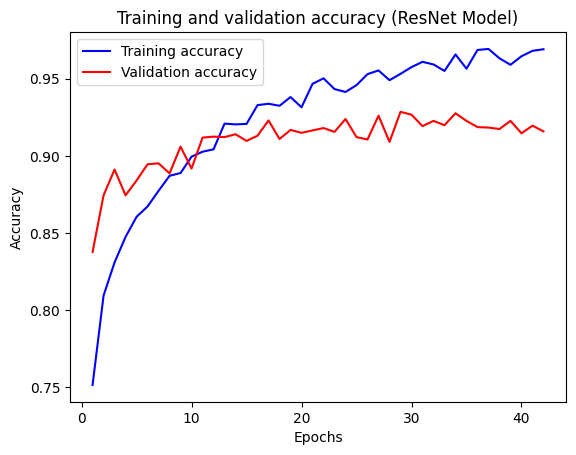

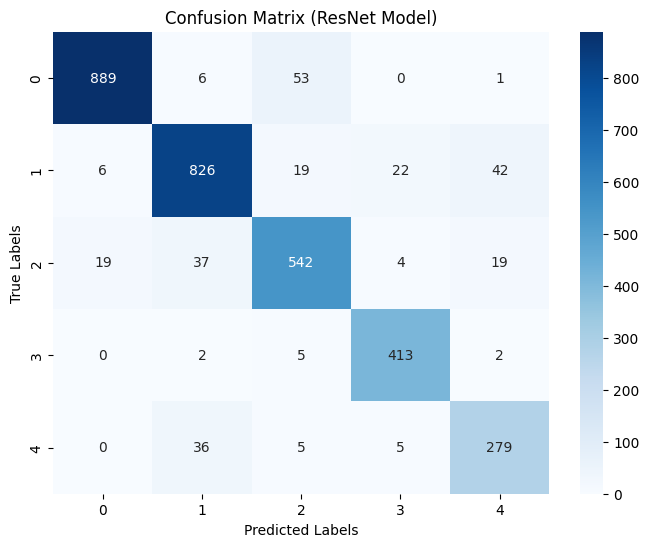

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       949
           1       0.91      0.90      0.91       915
           2       0.87      0.87      0.87       621
           3       0.93      0.98      0.95       422
           4       0.81      0.86      0.84       325

    accuracy                           0.91      3232
   macro avg       0.90      0.91      0.90      3232
weighted avg       0.91      0.91      0.91      3232



In [77]:
# 9. 훈련 및 검증 정확도 시각화
acc_resnet = history_resnet.history['accuracy']
val_acc_resnet = history_resnet.history['val_accuracy']
epochs_resnet = range(1, len(acc_resnet) + 1)
plt.plot(epochs_resnet, acc_resnet, 'b', label='Training accuracy')
plt.plot(epochs_resnet, val_acc_resnet, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy (ResNet Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 10. 혼동 행렬
y_pred_labels_resnet = np.argmax(preds_resnet[:, :-1], axis=1)
y_true_labels_resnet = np.argmax(y_test_ood[:, :-1], axis=1)
cm_resnet = confusion_matrix(y_true_labels_resnet, y_pred_labels_resnet)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (ResNet Model)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 11. precision, recall, f1-score
print(classification_report(y_true_labels_resnet, y_pred_labels_resnet))

In [79]:
resnet_model.save('resnet_model.h5')
print("모델이 resnet_model.h5 파일로 저장되었습니다.")

모델이 resnet_model.h5 파일로 저장되었습니다.


/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [80]:
# 모델 로드 (선택 사항)
# from tensorflow.keras.models import load_model
# loaded_model = load_model('resnet_model.h5')